While looking at the dataset provided by the analytics department with the hits for every hour of the first month, we can see that on the last 5-6 days, the hits are larger as compared to the previous days. We think when one person read the blog and like it, he/she may refer to other friends. So looking at the data, we can say that "word of mouth" may have a significant role to increase the hits. Also, we can assume that more people are reading the blog as more longer it is active. Hence, we can expect more traffic in the future rather than this first month. After visualizing the growth of hits and predicting the future hits building a linear regression model, we will be statistically clear.

The file project1-hits.txt is opened using using open function from python, and all the lines are inside the file  as a seprate list. Further , the data hour and hits seprated by comma again seprated in two different list . hour[] and list[]. At the same time "nan" values are filtered while appending in the list.


In [43]:
#preprocessing and data cleaning(filtering data with nan)
with open("project1-hits.txt") as f:
    array = f.read().splitlines()
    f.close()
hits = []
hour = []
for items in array:
    a = items.split(',')[0]
    b = items.split(',')[1]
    if b != "nan":
        hour.append(int(a))
        hits.append(int(b))


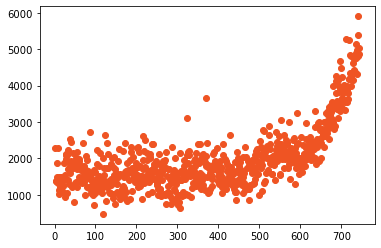

In [44]:
#visualization of data with the help of scatter plot using graphics library: matplotlib
import matplotlib.pyplot as plt
plt.scatter(hour, hits, c='#ef5423', label='data points')

We have used matplotlib graphics library to build an scatterplot plotting all the data points for every hour and hits.After Visualizing the data above, while looking at the first 25 days the hits are in the average range of 800 to 2500. We did not notice any significant change for the first 25 days. But after the first 25days, the websites is gaining its popularity. We can see the number of hits are gaining highly at the end of the first month. So while looking at this plot we can say that more people are gonna visit this site in future.

In [37]:
#creating functions for the calculations of simple linear regression model
def SUM_List(list):
   return sum(list)

def SUM_of_Pair(list1,list2):
   res_list = []
   for i in range(0, len(list1)):
    res_list.append(list1[i] * list2[i])
    return sum(res_list)

def SUM_of_square(list):
   res_list = []
   for i in range(0, len(list)):
    res_list.append(list[i] * list[i])
   return sum(res_list)

Above functions are created to practice good programming styles. Each function have their own task. SUM_List can return the overall sum of Data inside the list. Sum_of_Pair function receives two list and can perform cross multiplication between two list of data, having same index. And return the overall sum. Similarly, the function Sum_of_square return the sum of square of data inside the list. After defining the functions, we have called the functions below to calculate the required values with an objective to determine the slope and Y-intercept.

In [38]:
#Calculating the required values for determining slope and y-intercept in regression
sum_of_x=SUM_List(hour)
sum_of_y=SUM_List(hits)
sum_of_pair=SUM_of_Pair(hour,hits)
sum_of_square_x=SUM_of_square(hour)
sum_of_square_y=SUM_of_square(hits)

In [21]:
#Implementation of y=mx+c concept to find slope and y intercept on the basis of given data
N=len(hour)
slope=((N*sum_of_pair)-(sum_of_x*sum_of_y))/((N*sum_of_square_x)-(sum_of_x*sum_of_x))
intercept=(sum_of_y-(slope*sum_of_x))/N
print('Slope:',slope,'Y-Intercept:',intercept)

Slope: 2.6192848162510547 Y-Intercept: 983.2274828330094


After calculating the slope and y-intercept depending on the provided data, we got Slope=2.619 and Y-intercept=983.22. Below, we have used linespace function to create an evenly spaced sequence in a specified interval.To get values for y we need to convert the numpy array for the list, thats why numpy library is used in our code.

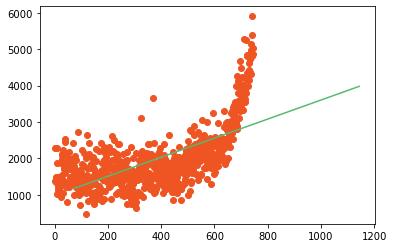

In [39]:
def linspace(a, b, n=100):
    diff = (b - a)/(n - 1)
    return [ round(diff,8) * i + a  for i in range(n)]

import numpy as np
max_x = max(hour) + 400
min_x = min(hits) - 400
x = linspace (min_x, max_x, 100)
y=intercept+slope*np.array(x)
plt.scatter(hour, hits, c='#ef5423', label='data points')
plt.plot(x, y, color='#58b970', label='Regression Line')

 Below we have tried to predict the hits on the websites during the Noon of the 5th day of next month(x=744+24*4+12).

In [22]:
#predicting hits on the basis of hour
Y=intercept+slope*852
print('Number of hits during the Noon of the 5th day of next month:',Y)

Number of hits during the Noon of the 5th day of next month: 3214.858146278908


After calculating the slope and y-intercept from scratch, visualizing the regression line with the scatterplots and predicting the hits on the basis of hour, we planned to validate our result(slope and y-intercept) using inbuild linear regression function in R. Below we have tried to validate our result comparing the slope and y-intercept with the values we got while building a linear regression model in R working on same data.

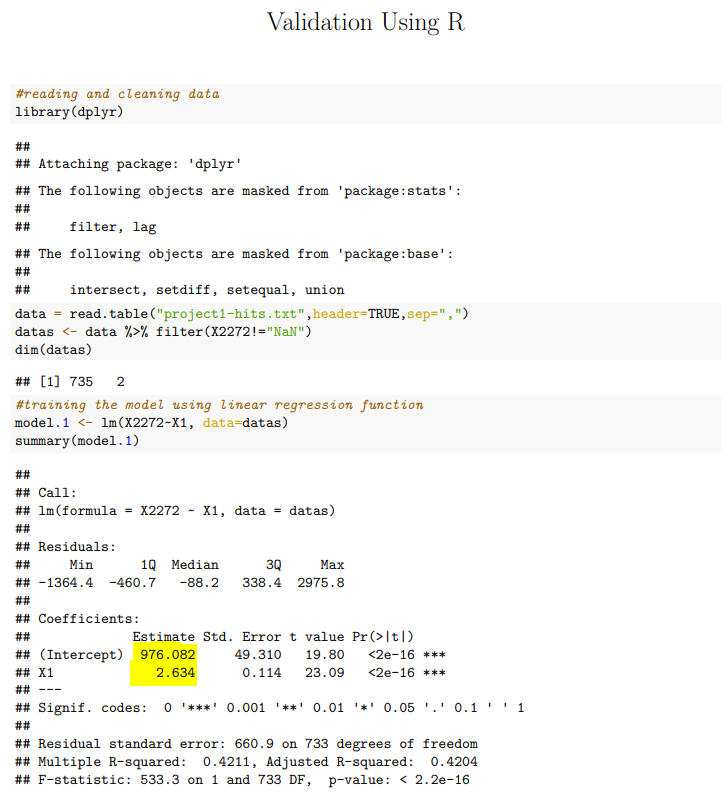

In [24]:
from IPython.display import Image
Image("img/validation.png")

Comparision between Linear Regression model we built from scratch and the validation model in R:
From our calculation we got slope = 2.619 and Y-intercept= 983.227 and to do the prediction for the noon of fifth day for next month, predicted hits on that hour = 3214.858. After validating this calculation by building a regression model in R, we got slope= 2.634 , y-intercept=976.082 and prediction for the noon of fifth day for next month= 3220.25. Here the predicted values are nearly equal to each other. So we think that our implementation of Simple Linear Regression is working fine. 

Discussion of possible weakness and better alternatives:
While looking at the scatterplot we can see the spike on the last 5 days as the hits is growing significantly than in previous weeks. But the linear regression model we built donot provide the flexibility to visualize that spike. This is the weakness we found and we donot think this linear analysis predicts the accurate popularity of our site in future. So while talking about other analytical approaches, we suggest non linear regression models can be more accurate. This is because these non linear regression models have better flexibility to fit curves than the simple linear regression models and this kind of flexibility can be useful to consider the significant spike of hits at the end of the month. 